# Análisis Completo de Regresión Lineal

Este notebook muestra paso a paso cómo realizar un análisis de **Regresión Lineal** empleando un conjunto de datos que contiene:
- **valuationdate**: fecha de valoración (opcional para el modelo)
- **revenues**: ingresos
- **ebit**: utilidad antes de intereses e impuestos
- **depreciation**: depreciación
- **capex**: gastos de capital
- **ncwc**: cambio en capital de trabajo neto
- **bv**: (posiblemente) valor en libros
- **y**: variable objetivo que deseamos predecir (por ejemplo, un valor financiero o de valoración)

Iremos desde la **carga** y **exploración** del dataset hasta la **interpretación** de coeficientes y la **evaluación** de métricas importantes.

In [4]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv

--2025-03-05 22:33:25--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv [following]
--2025-03-05 22:33:25--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/PrimerCorte/RegresionLineal/enterprise.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82415 (80K) [text/plain]
Saving to: ‘enterprise.csv.1’

enterprise.csv.1    100%[============

## Paso 0: Importar librerías y configuración

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


## Paso 1: Carga y Exploración de Datos (EDA)

En este primer bloque, cargaremos nuestro dataset y realizaremos un Análisis Exploratorio básico.

In [5]:
df = pd.read_csv('enterprise.csv')

In [6]:
df.head()

,valuationdate,revenues,ebit,depreciation,capex,ncwc,bv,y
0,30/06/2011,86470.700,10387.500,6429.000,3512.000,16848.900,47945.100,91760.800
1,31/12/2010,84754.200,14031.181,8658.600,17172.500,12095.100,66804.400,184461.700
2,30/09/2016,15653.480,221.347,647.239,749.478,1468.428,10128.726,23323.685
3,30/09/2018,62001.330,7551.762,1808.830,2702.850,11873.255,27144.930,130202.792
4,30/09/2014,1242.830,497.142,232.027,1552.908,149.971,1463.052,11472.123


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   valuationdate  1061 non-null   object 
 1   revenues       1061 non-null   float64
 2   ebit           1061 non-null   float64
 3   depreciation   1061 non-null   float64
 4   capex          1061 non-null   float64
 5   ncwc           1061 non-null   float64
 6   bv             1061 non-null   float64
 7   y              1061 non-null   float64
dtypes: float64(7), object(1)
memory usage: 66.4+ KB


In [8]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1061.000,1061.000,1061.000,1061.000,1061.000,1061.000,1061.000
mean,163272.694,24076.407,8002.050,10961.602,22324.131,80571.617,329223.752
std,221382.753,31871.077,13898.136,20250.735,54636.422,104349.985,405670.062
min,85.600,-29982.980,-5.690,-694.661,-118819.899,-15039.647,369.200
25%,42659.576,4522.900,999.340,1666.600,3115.247,16895.000,69810.100
50%,108201.100,12224.612,3446.250,4949.447,10736.200,41722.900,185041.566
75%,186248.542,32228.942,8361.220,11201.479,23454.185,114756.258,425827.300
max,2586711.900,289541.300,128993.500,205525.700,623588.700,1009025.800,4175891.774


In [9]:
df.isnull().sum()

,0
valuationdate,0
revenues,0
ebit,0
depreciation,0
capex,0
ncwc,0
bv,0
y,0


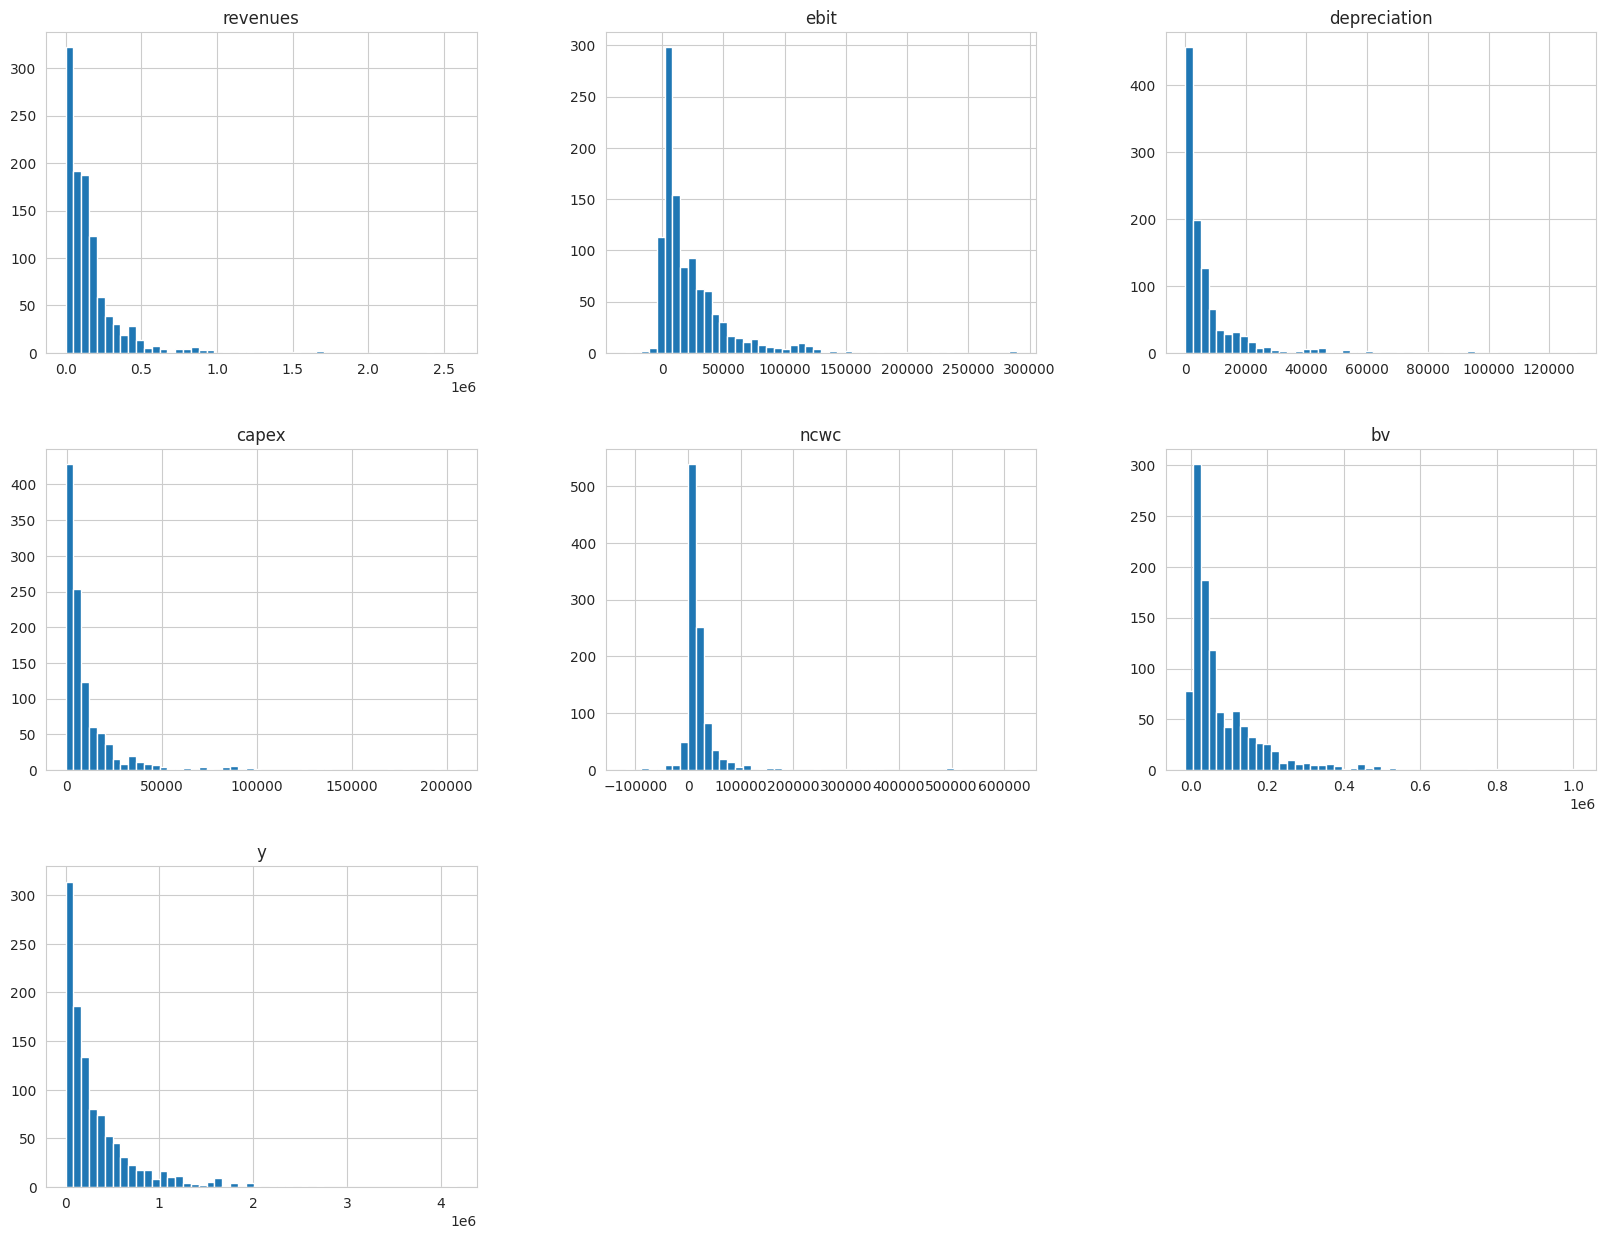

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

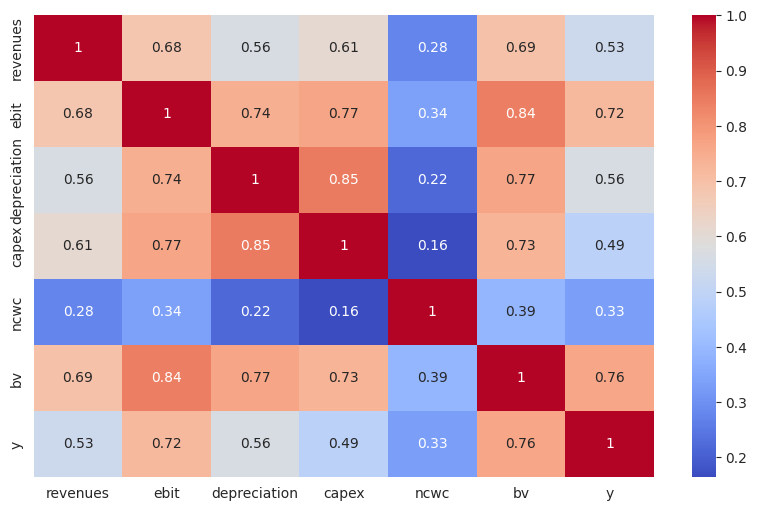

In [11]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


### Estadísticas Descriptivas y Distribuciones

In [12]:
import matplotlib.pyplot as plt

In [13]:
df.describe()

,revenues,ebit,depreciation,capex,ncwc,bv,y
count,1061.000,1061.000,1061.000,1061.000,1061.000,1061.000,1061.000
mean,163272.694,24076.407,8002.050,10961.602,22324.131,80571.617,329223.752
std,221382.753,31871.077,13898.136,20250.735,54636.422,104349.985,405670.062
min,85.600,-29982.980,-5.690,-694.661,-118819.899,-15039.647,369.200
25%,42659.576,4522.900,999.340,1666.600,3115.247,16895.000,69810.100
50%,108201.100,12224.612,3446.250,4949.447,10736.200,41722.900,185041.566
75%,186248.542,32228.942,8361.220,11201.479,23454.185,114756.258,425827.300
max,2586711.900,289541.300,128993.500,205525.700,623588.700,1009025.800,4175891.774


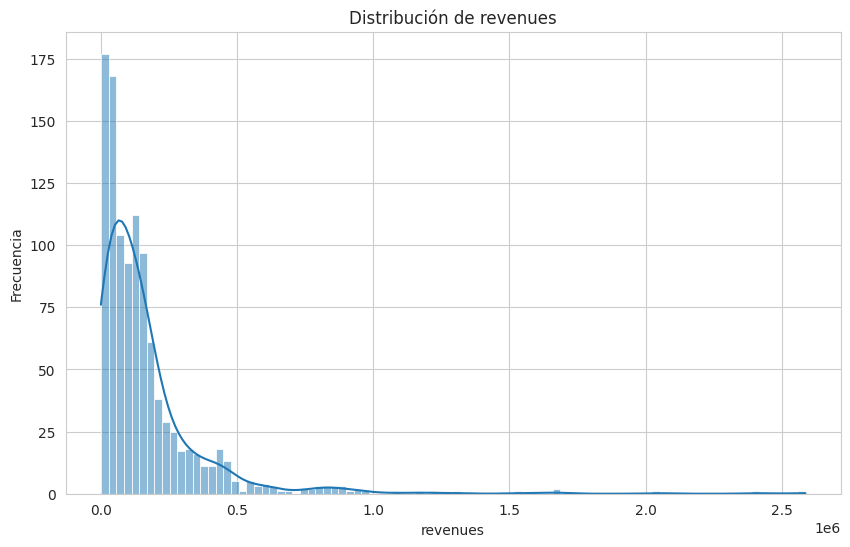

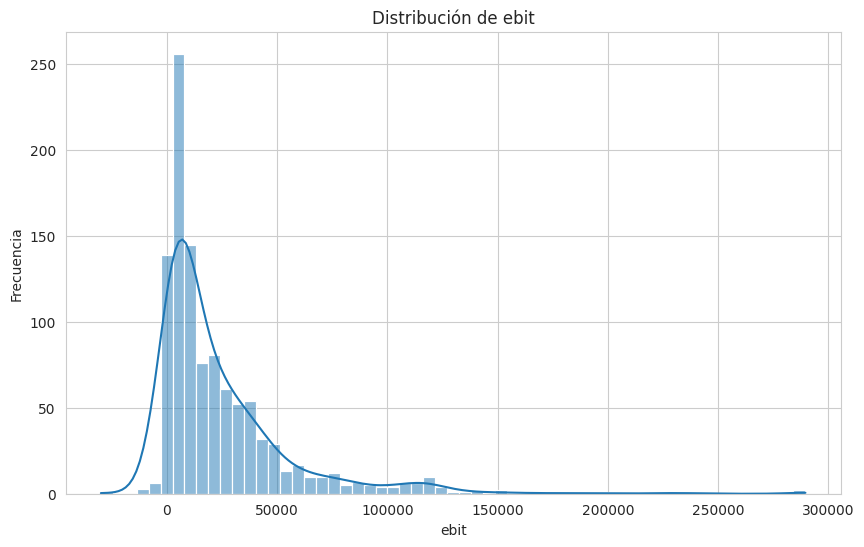

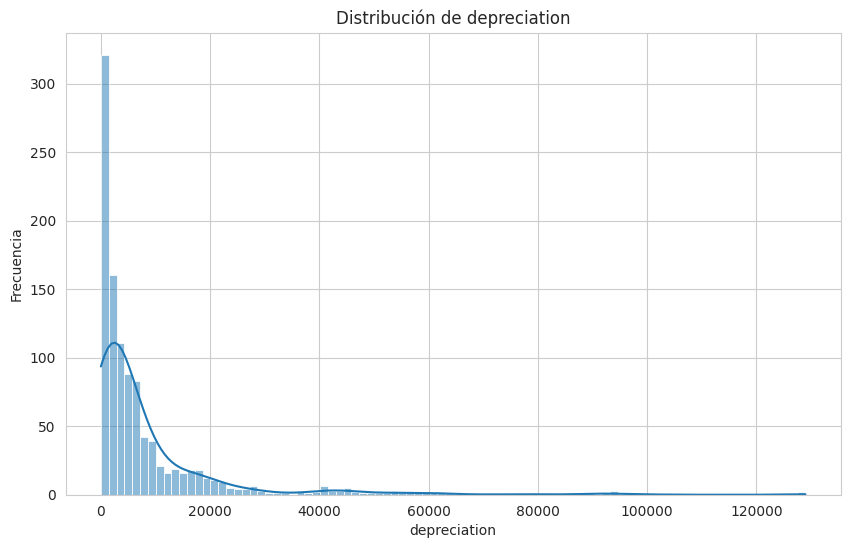

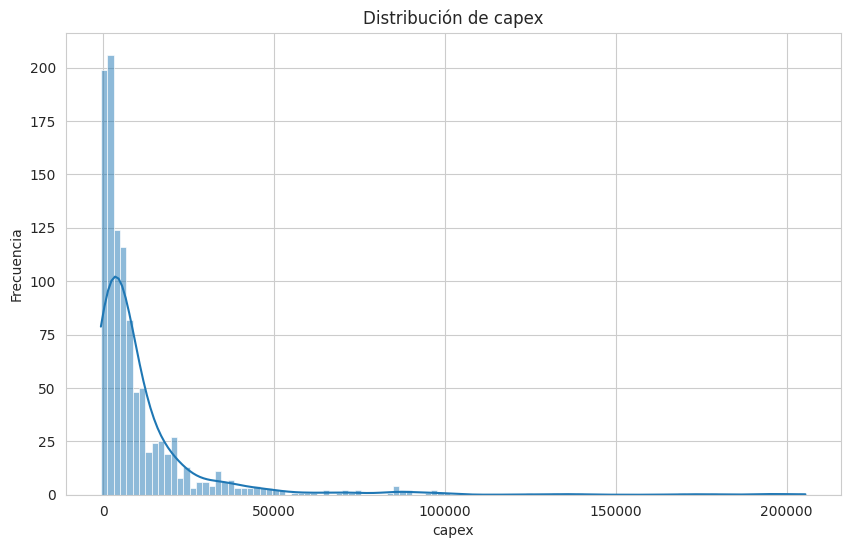

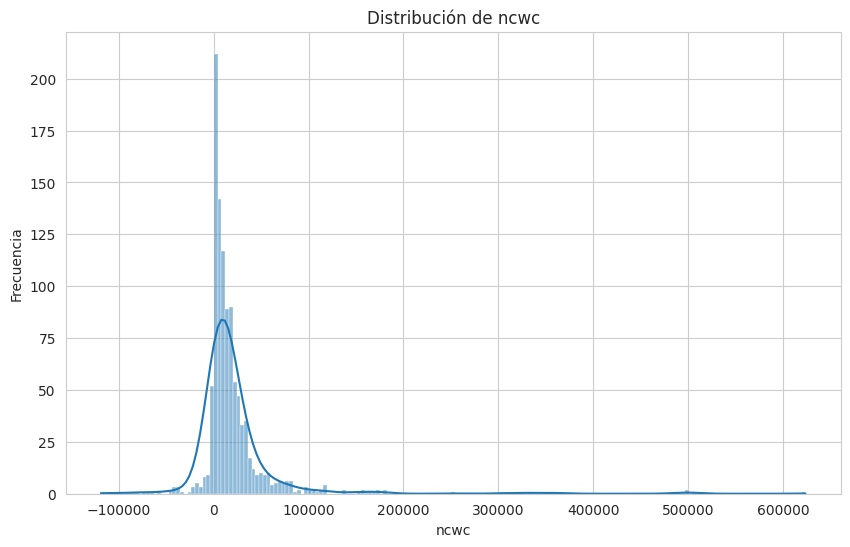

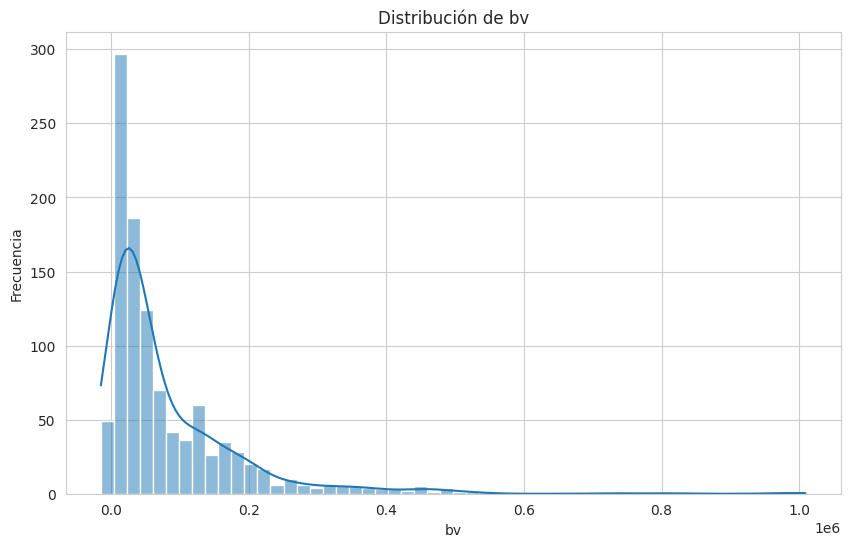

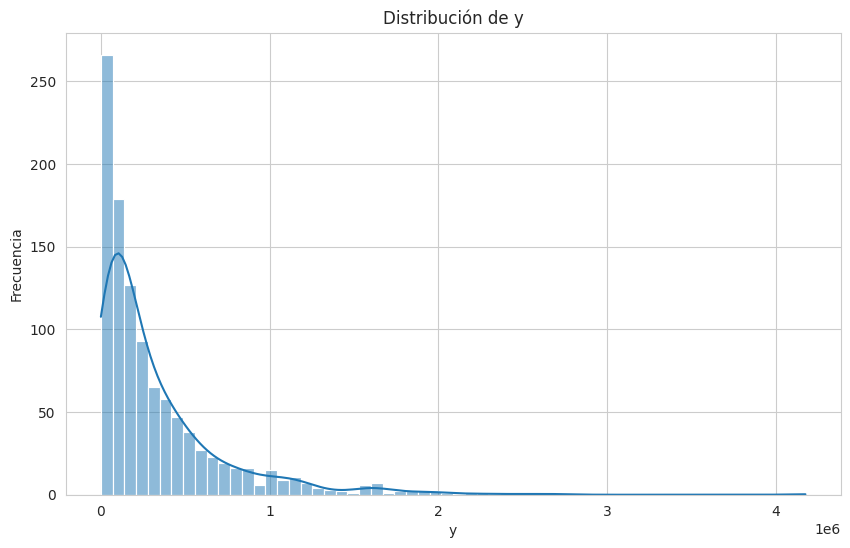

In [14]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()


### Preguntas de Reflexión (Exploración)
1. ¿Qué tipo de problema estás intentando resolver al usar `y` como variable objetivo?
2. ¿Notas valores atípicos (outliers) en alguna de las variables? ¿Cómo podría afectar a la regresión lineal?
3. ¿Crees que la columna `valuationdate` podría aportar información para predecir `y`, o la excluirías del análisis?

_Responde con tu razonamiento propio aquí._

*PRIMERO*

El problema que se está intentando resolver es de predicción, específicamente un problema de regresión.

Razonamiento:

y es una variable continua: En el comentario del código, se menciona que y representa un valor financiero o de valoración. Estos valores suelen ser continuos (pueden tomar cualquier valor dentro de un rango).
Se usa Regresión Lineal: El título del notebook y el código indican que el objetivo es realizar un análisis de regresión lineal. La regresión lineal se utiliza para predecir variables continuas.
Objetivo: Se busca un modelo que pueda predecir el valor de y en función de otras variables (ingresos, utilidad, depreciación, etc.).

*SEGUNDO*

Basándonos en los histogramas del documento, se observa la presencia de posibles outliers en varias variables, asi como algunos valores muy altos y valores atipicos potenciales. Estos outliers pueden afectar negativamente la regresión lineal, distorsionando la línea de regresión, afectando la estimación de los coeficientes y reduciendo la precisión del modelo.

*TERCERO*

La columna valuationdate podría aportar información para predecir y, pero es necesario realizar un análisis más profundo para determinar su relevancia. Cabe aclarar que valuationdate es una variable de tipo fecha, que representa el momento en que se realizó la valoración, La relación entre la fecha de valoración y la variable objetivo puede ser compleja y depender del contexto específico del dataset.

## Paso 2: Preparación y Limpieza de Datos

1. **Manejo de valores faltantes**.
2. **Posible eliminación** o **imputación** de outliers.
3. **Transformaciones** (escalado, log, etc.) si son necesarias.

In [15]:
import numpy as np

In [16]:
df.dropna(inplace=True)

In [19]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [20]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [21]:
df = df.drop('valuationdate', axis=1)

### Pregunta de Reflexión (Limpieza)
¿Por qué es relevante tratar valores faltantes y/o outliers **antes** de entrenar el modelo de regresión lineal?

_Responde con tu razonamiento aquí._

tratar los valores faltantes y outliers antes del entrenamiento ayuda a
mejorar la precisión del modelo, reducir el sesgo en las predicciones,
asegurar que el modelo sea más robusto y generalizar mejor a nuevos datos.
Es fundamental tratar los valores faltantes y outliers antes de entrenar un modelo de regresión lineal por las siguientes razones:

los valores Faltantes:

Errores en el entrenamiento: La mayoría de los algoritmos de aprendizaje automático, incluyendo la regresión lineal, no pueden manejar valores faltantes directamente. Si no se tratan, el modelo podría no entrenarse correctamente o incluso arrojar un error.

Sesgo en los resultados: Los valores faltantes pueden introducir sesgos en el modelo si no se distribuyen aleatoriamente en los datos. Por ejemplo, si los valores faltantes en una variable están relacionados con el valor de la variable objetivo, el modelo podría aprender patrones incorrectos.

Reducción de la precisión: Los valores faltantes reducen la cantidad de datos disponibles para el entrenamiento, lo que puede afectar la precisión del modelo.



## Paso 4: Selección de Variables e Implementación del Modelo

1. **Seleccionar** cuáles columnas usarás como variables explicativas (features). Puede que uses todas o hagas una selección.
2. **Asignar** `X` (features) y `y` (variable objetivo).
3. **Dividir** en conjunto de entrenamiento (train) y conjunto de prueba (test).

In [22]:
features = ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']

In [23]:
X = df[features]
y = df['y']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preguntas de Reflexión (Selección de Variables)
1. ¿Por qué es importante separar los datos en train y test?
2. ¿Qué pasaría si entrenas y evalúas en el **mismo** conjunto de datos?

_Responde con tu razonamiento._

*PRIMERO*

Es fundamental separar los datos en conjuntos de entrenamiento (train) y prueba (test) porque:
Evaluación del Modelo: El conjunto de prueba permite simular cómo se comportaría el modelo con datos nuevos e invisibles durante el entrenamiento.
Evitar el Sobreajuste (Overfitting): Si se entrena y evalúa un modelo con los mismos datos, existe el riesgo de sobreajuste. El modelo podría memorizar los datos de entrenamiento y obtener un rendimiento en ellos.

Mejorar la Generalización: Al entrenar el modelo solo con una parte de los datos (train) y probarlo con otra (test), se busca que el modelo aprenda patrones generales en lugar de detalles específicos del conjunto de entrenamiento.
Es importante seprarar los datos para evaluar la capacidad de generalización del modelo, evitar el sobreajuste y asegurar un rendimiento confiable.

*SEGUNDO*

Si entrenas y evalúas un modelo en el mismo conjunto de datos, hay riesgo a un problema llamado sobreajuste (overfitting).
Esto ocurre cuando un modelo aprende los datos de entrenamiento con demasiado detalle, incluyendo el ruido y las particularidades específicas de ese conjunto de datos. En lugar de aprender patrones generales, el modelo memoriza los ejemplos de entrenamiento.
En resumen entrenar y evaluar un modelo en el mismo conjunto de datos lleva al sobreajuste, por esto es importante separar los datos en conjuntos de prueba.

## Paso 5: Entrenar el Modelo de Regresión Lineal
Usaremos la clase `LinearRegression` de scikit-learn.

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print("Coeficientes:", model.coef_)
print("Intersección:", model.intercept_)

Mean Squared Error (MSE): 0.2316233554783328
R-squared (R2): 0.750329747643131
Coeficientes: [ 0.0047738   0.64094621 -0.02482996 -0.11270797  0.04020249  0.41927139]
Intersección: 0.007318316937731552


### Interpretación de Coeficientes
Si la lista de features es `["revenues", "ebit", "depreciation", "capex", "ncwc", "bv"]` y tu `model.coef_` es algo como `[a, b, c, d, e, f]`, entonces:

\[ y \approx \beta_0 + a\cdot revenues + b\cdot ebit + c\cdot depreciation + d\cdot capex + e\cdot ncwc + f\cdot bv \]

Cada coeficiente indica cómo cambia `y` en promedio **por cada unidad** que se incrementa la variable (manteniendo las demás constantes).

## Paso 6: Evaluación y Validación del Modelo
Usaremos las siguientes métricas:
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coeficiente de Determinación)**

In [30]:
from sklearn.metrics import mean_absolute_error

In [33]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.3300169771882091


In [32]:
print(f"R-squared (R2): {r2}")

R-squared (R2): 0.750329747643131


### Preguntas de Reflexión (Evaluación)
1. ¿Por qué comparamos las métricas en **Entrenamiento** vs **Prueba**?
2. ¿Qué significa si el error en entrenamiento es **muy** distinto (mucho menor o mucho mayor) que en prueba?
3. ¿Cómo interpretar un **R²** cercano a 1, cercano a 0 o incluso negativo?

_Responde con tu razonamiento._

*PRIMERA*

La comparación de métricas en Entrenamiento vs Prueba es fundamental para primero, detectar sobreajuste y subajuste, evaluar la capacidad de generalización del modelo, ajustar la complejidad del modelo para optimizar su rendimiento y obtener una estimación realista del rendimiento del modelo en datos nuevos.
Comparar las métricas en Entrenamiento vs Prueba es crucial para evaluar la capacidad de generalización de un modelo de aprendizaje automático, como la regresión lineal.

*SEGUNDA*

Error en entrenamiento << Error en prueba: Sobreajuste, el modelo no generaliza.

Error en entrenamiento >> Error en prueba: Revisa la división de datos o el código de evaluación. Podría ser subajuste pero es menos probable.

*TERCERA*

R² cercano a 1: Buen ajuste (pero revisa si hay sobreajuste).

R² cercano a 0: Ajuste pobre, el modelo no explica mucho.

R² negativo: Algo anda mal, revisa el modelo y los datos.

### Pregunta de Reflexión (Residuos)
Si observas un patrón claro en la gráfica de residuos (por ejemplo, forma de U), ¿qué podría indicar respecto a las **asunciones** de la regresión lineal?

_Responde con tu razonamiento._

Un patrón en la gráfica de residuos, como una forma de U, es una señal de que las asunciones de la regresión lineal pueden no cumplirse. Esto indica que el modelo puede no ser el más adecuado para los datos y que se deben considerar otras opciones.

## Paso 8: Interpretación y Conclusiones

1. **Revisa** los coeficientes: ¿son consistentes con la lógica de negocio? (p.ej., si `ebit` aumenta, esperas que `y` aumente o disminuya?).
2. **Observa** el nivel de error y R²: ¿el modelo es suficientemente bueno para su uso práctico?
3. **Considera** la posibilidad de:
   - Añadir más variables.
   - Aplicar **regresiones polinómicas** (X², X³) si sospechas no linealidad.
   - Usar **regularización** (Ridge, Lasso) si hay multicolinealidad o se requieren coeficientes más estables.

In [34]:
print("Coeficientes:", model.coef_)
print("Nombres de las características:", features)


Coeficientes: [ 0.0047738   0.64094621 -0.02482996 -0.11270797  0.04020249  0.41927139]
Nombres de las características: ['revenues', 'ebit', 'depreciation', 'capex', 'ncwc', 'bv']


In [35]:
ebit_coefficient_index = features.index('ebit')
ebit_coefficient = model.coef_[ebit_coefficient_index]

In [37]:
print(f"\nCoeficiente de ebit: {ebit_coefficient}")


Coeficiente de ebit: 0.6409462052812269


In [38]:
if ebit_coefficient > 0:
  print("Si ebit aumenta, se espera que 'y' aumente.")
elif ebit_coefficient < 0:
  print("Si ebit aumenta, se espera que 'y' disminuya.")
else:
  print("Si ebit aumenta, se espera que 'y' no cambie.")

Si ebit aumenta, se espera que 'y' aumente.


Para determinar si el modelo es "suficientemente bueno" para su uso práctico, debemos evaluar los valores de MSE y R² en el contexto del problema. Sin estos valores, no podemos dar una conclusión definitiva. Si los valores de MSE y R² son altos, es probable que el modelo necesite mejoras. Se pueden considerar opciones como añadir más variables, aplicar regresiones polinómicas o usar regularización.



In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [40]:
poly = PolynomialFeatures(degree=3, include_bias=False) # Grado 3, se pueden probar diferentes grados
X_poly = poly.fit_transform(X)

In [41]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)

In [42]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=1.0)
}

In [43]:
results = {}
for name, model in models.items():
  model.fit(X_train_poly, y_train)
  y_pred = model.predict(X_test_poly)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  results[name] = {"MSE": mse, "R2": r2, "MAE": mae}
  print(f"Resultados para {name}:")
  print(f"  MSE: {mse}")
  print(f"  R2: {r2}")
  print(f"  MAE: {mae}")


Resultados para Linear Regression:
  MSE: 0.13674563423867617
  R2: 0.852599851433099
  MAE: 0.24511899182399596
Resultados para Ridge Regression:
  MSE: 0.13431747097813082
  R2: 0.8552172046476402
  MAE: 0.24429911013252176
Resultados para Lasso Regression:
  MSE: 0.9350795304984821
  R2: -0.007936103296533936
  MAE: 0.7740049034051456


In [44]:
best_model = min(results, key=lambda k: results[k]['MSE'])
print(f"\nMejor Modelo: {best_model} con MSE: {results[best_model]['MSE']}, R2: {results[best_model]['R2']}, MAE: {results[best_model]['MAE']}")


Mejor Modelo: Ridge Regression con MSE: 0.13431747097813082, R2: 0.8552172046476402, MAE: 0.24429911013252176


### Preguntas de Reflexión Final
1. ¿Crees que la Regresión Lineal Simple/Múltiple **captura adecuadamente** las relaciones en tus datos?
2. ¿Qué otras técnicas (ej. árboles de decisión, bosques aleatorios, etc.) considerarías para comparar resultados?
3. ¿El dataset es suficientemente grande y variado para hacer conclusiones robustas?

_Responde con tu razonamiento._

*PRIMERA*

la regresión lineal puede ser una buena opción para modelar relaciones lineales en los datos, pero es importante evaluar cuidadosamente el rendimiento del modelo y considerar otras opciones si es necesario.

*SEGUNDA*

algunas técnicas alternativas para comparar resultados con la regresión lineal que se ha implementado:

1. Árboles de Decisión:
 son modelos que utilizan una estructura de árbol para realizar predicciones. Dividen los datos en subconjuntos basados en las variables predictoras, creando un conjunto de reglas para la clasificación o regresión.

2. Bosques Aleatorios (Random Forests):

Los bosques aleatorios son un conjunto de árboles de decisión que se entrenan en diferentes subconjuntos de los datos y variables. La predicción final se obtiene promediando las predicciones de todos los árboles.
3. Support Vector Machines (SVM):

Busca un hiperplano que separa los datos en diferentes clases con el mayor margen posible. Puede ser utilizado para regresión utilizando una función kernel.

4. Redes Neuronales:

Las redes neuronales son modelos inspirados en el cerebro humano, que consisten en capas de nodos interconectados. Pueden ser utilizadas para regresión y clasificación.

*TERCERA*

Sin más información sobre el tamaño y la variedad del dataset, es difícil determinar con certeza si es suficiente para hacer conclusiones robustas. Si tienes dudas, es mejor ser cauteloso al interpretar los resultados y considerar las recomendaciones mencionadas anteriormente.

Recuerda que la calidad de las conclusiones depende no solo del tamaño y la variedad del dataset, sino también de la calidad de los datos, la elección del modelo y la correcta aplicación de las técnicas estadísticas.

## Resumen
En este Notebook hemos:
1. **Explorado** los datos (EDA) y detectado posibles outliers.
2. **Limpieza** de datos y transformaciones opcionales.
3. **Seleccionado** variables y dividido en train/test.
4. **Entrenado** un modelo de Regresión Lineal.
5. **Evaluado** con MSE, MAE, R² y analizado residuos.
6. **Reflexionado** sobre los coeficientes y conclusiones.

¡Has completado un **análisis de regresión lineal** de forma integral! Para afianzar, puedes:
- Ajustar parámetros (aunque la regresión lineal simple en sklearn no tiene muchos).
- Comparar con otros modelos.
- Realizar validación cruzada en lugar de una simple división train/test.

¡Éxitos en tu proyecto de análisis!